<img src="fga.png" width="1200" height="400">


<h1><center>Cripto Moedas, Correlação e Clusterização DBSCAN </center></h1>

A presente atividade prática abordará  a identificação das correlações de moedas digitais e uma clusterização não supervisionada, com a técnica de machine learning, denominada DBSCAN.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/" a/>
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


Importantes Bibliotecas Python:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import random
import investpy

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

<div id="Coleta de Cripto Moedas">
    <h2>1) Coleta de Cripto Moedas</h2>
</div>

In [2]:
symbols=investpy.crypto.get_cryptos()[:150]['name'].values
cols=[]
output=None
for symbol in tqdm(symbols):
    try: 
        df = investpy.get_crypto_historical_data(crypto=symbol, 
                                                from_date='04/03/2019', 
                                                to_date='04/03/2021')
        cols.append(symbol)

        if output is None:
            output = df.Close
        else:
            output = pd.concat([output, df.Close], axis = 1)
    except:
        print("Erro = "+symbol)
output.columns=cols

 23%|██▎       | 34/150 [01:41<39:14, 20.30s/it]

Erro = Paxos Standard


 52%|█████▏    | 78/150 [02:29<01:17,  1.07s/it]

Erro = Karatgold Coin


 60%|██████    | 90/150 [02:42<00:59,  1.01it/s]

Erro = MineBee


 61%|██████    | 91/150 [02:43<00:54,  1.08it/s]

Erro = MineBee


 75%|███████▌  | 113/150 [03:12<00:37,  1.03s/it]

Erro = Dynamic Trading Rights


100%|██████████| 150/150 [03:53<00:00,  1.55s/it]


<AxesSubplot:ylabel='Date'>

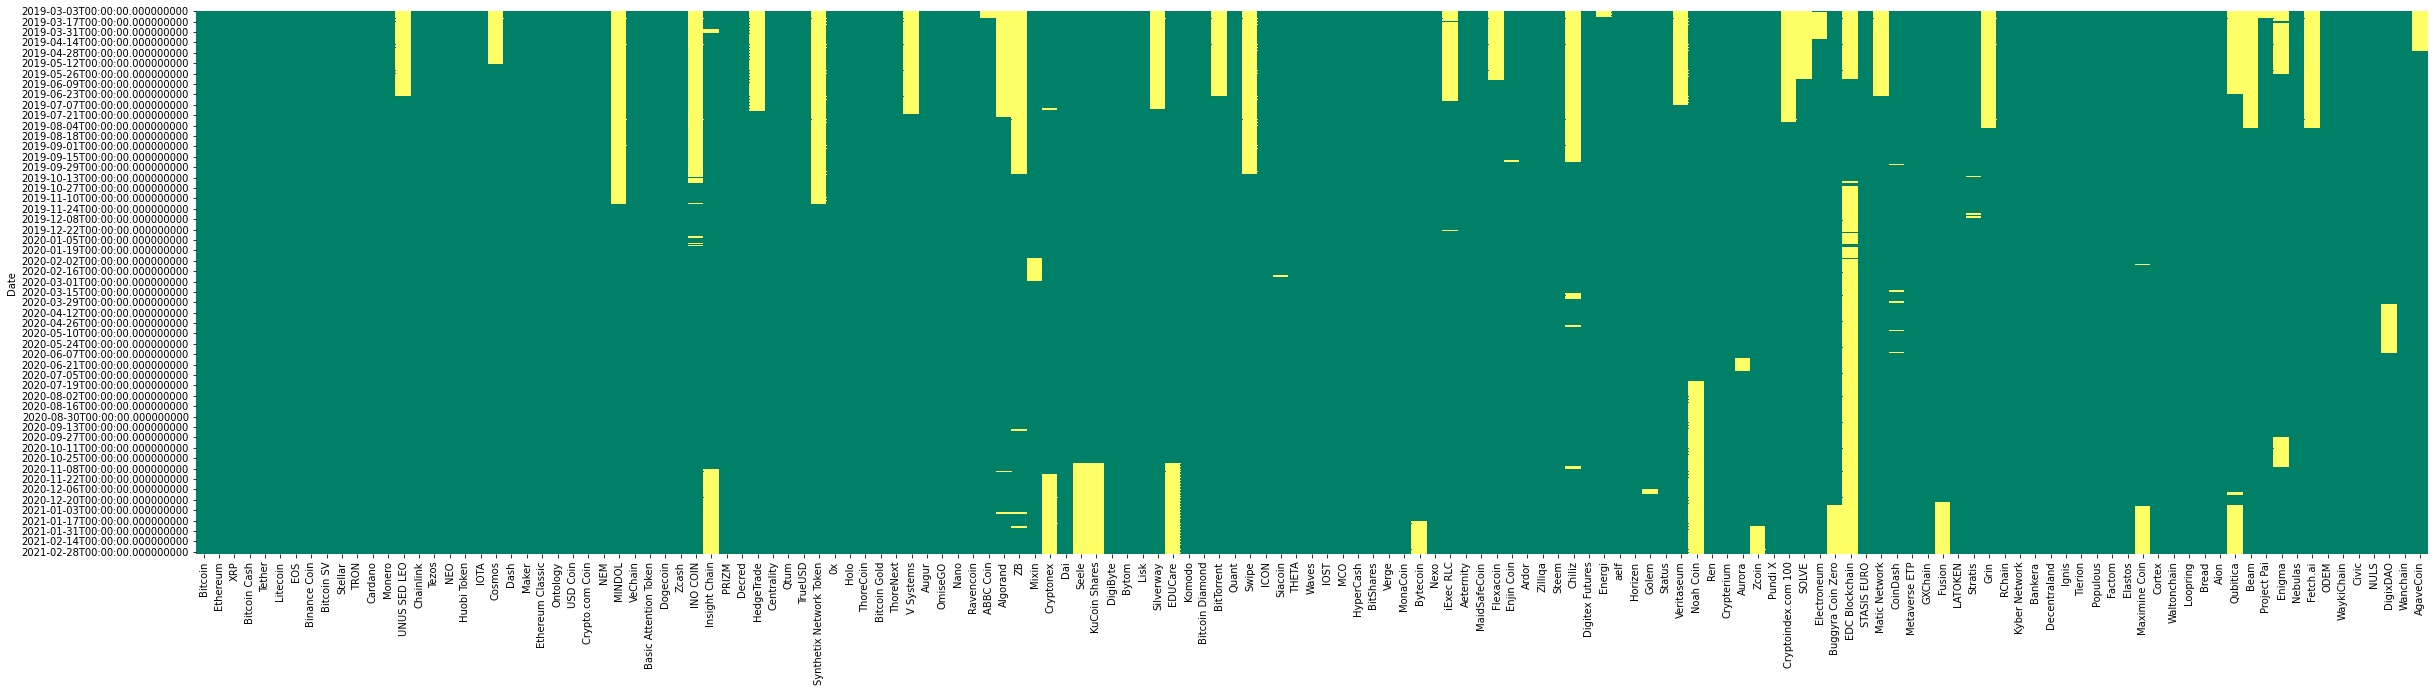

In [3]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

In [4]:
len(output.columns)

145

['Erros', 0, 'Ativos', 96]

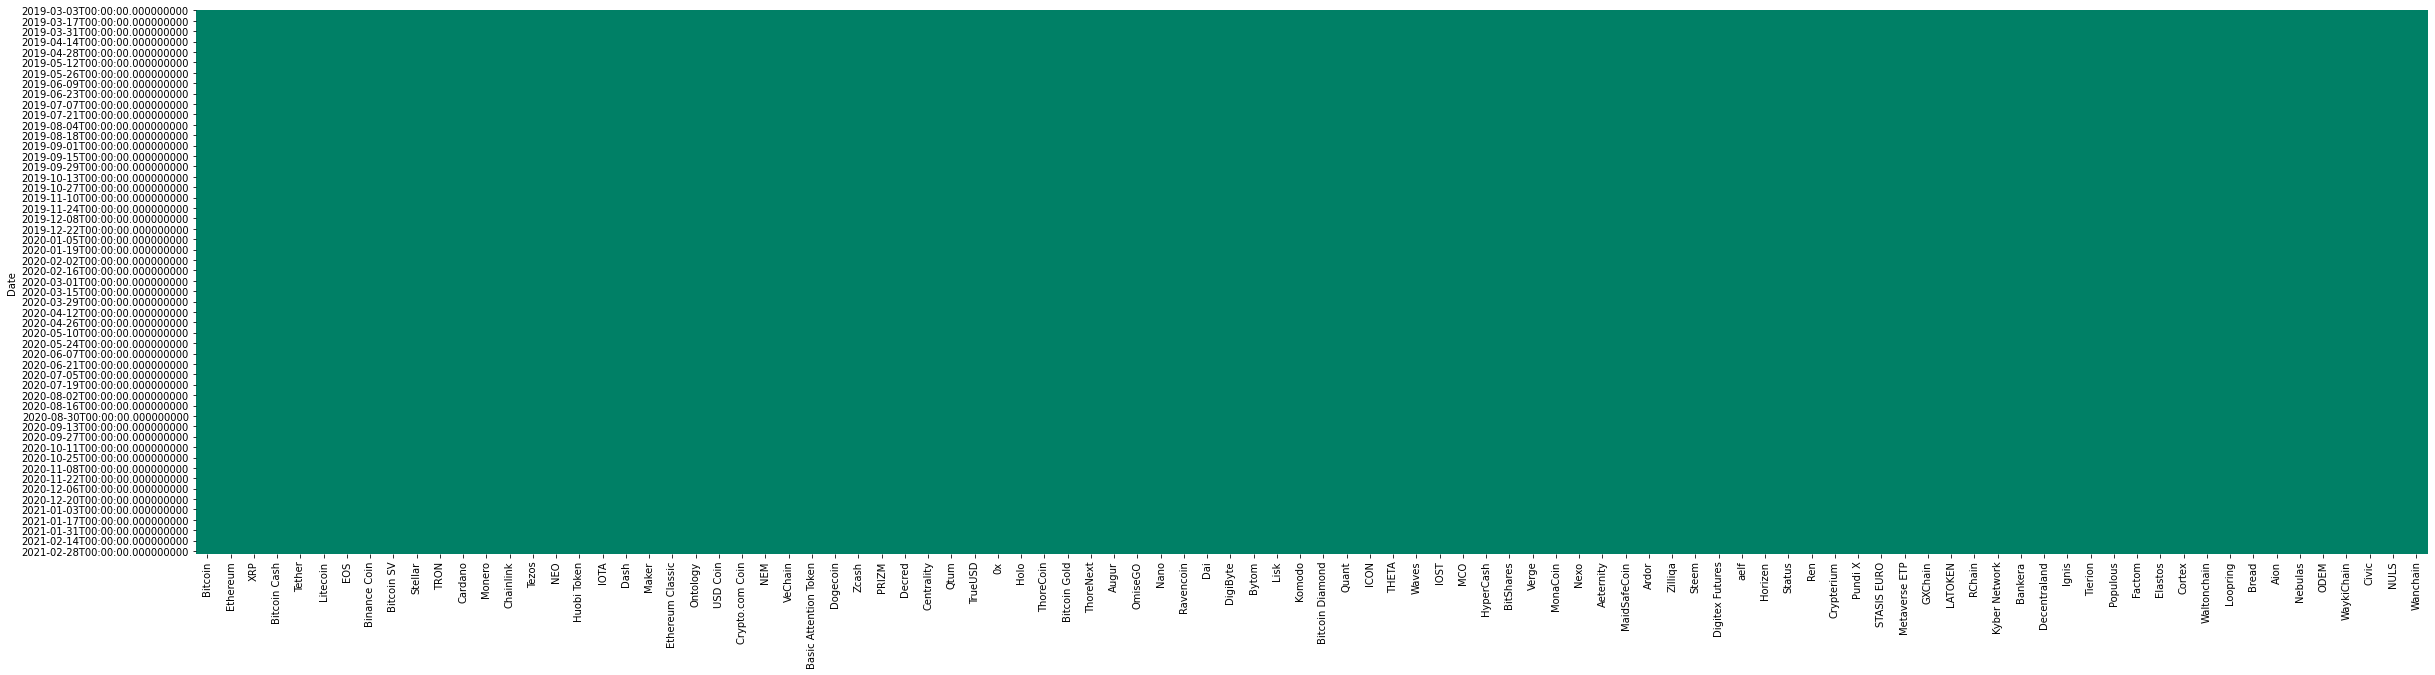

In [5]:
output=output.dropna(axis=1)
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

Text(0.5, 1.0, 'Correlação entre Moedas Digitais')

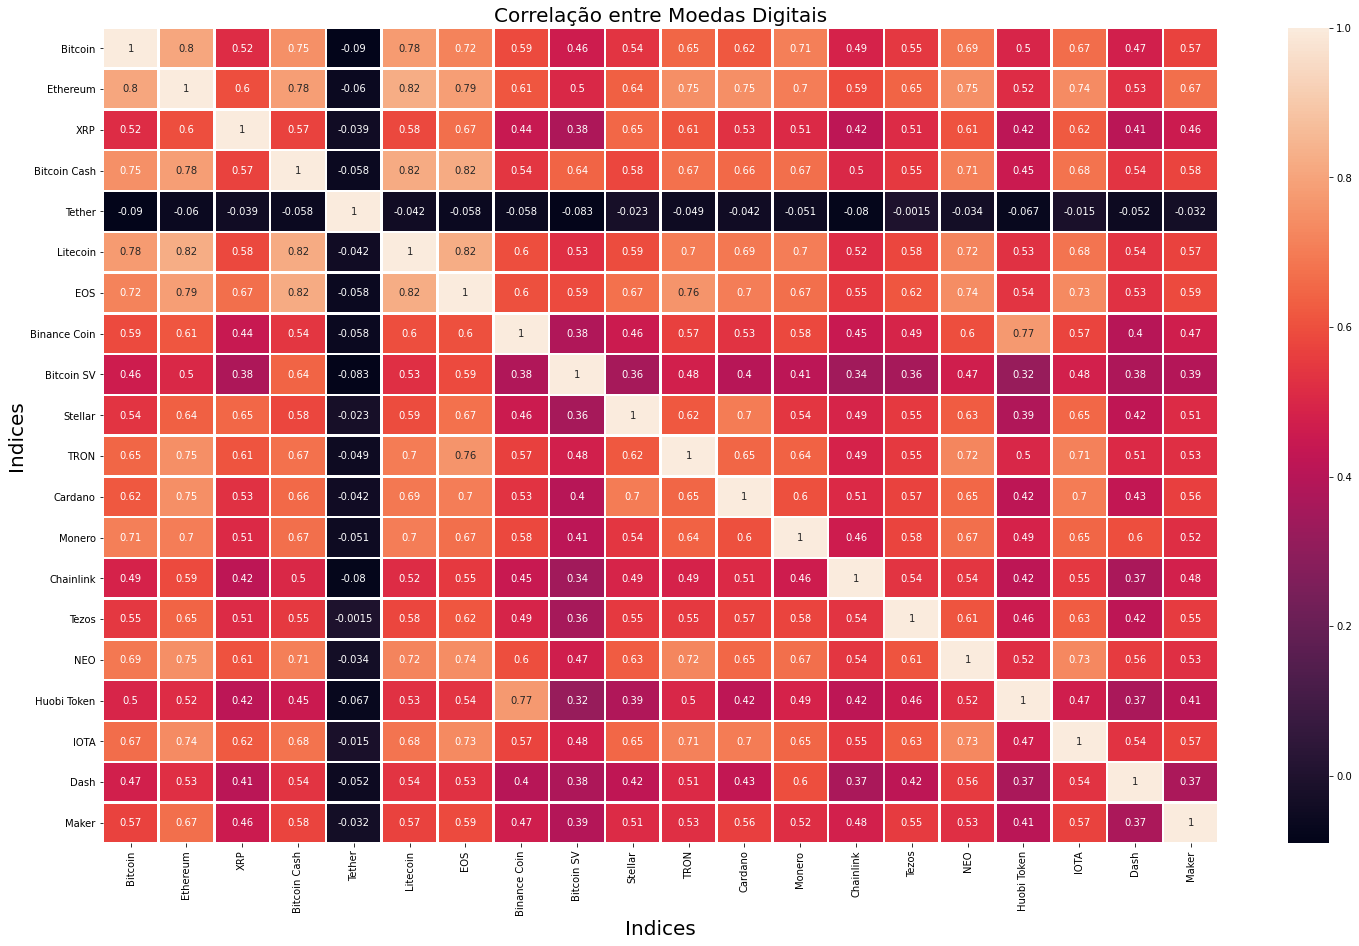

In [6]:
corre=output[output.columns[:20]].pct_change().corr()
fig = plt.subplots(figsize=(25,15))
ax2=plt.subplot(1,1,1)  
sns.heatmap(corre, annot=True, linewidths=1.5, ax=ax2)
ax2.set_ylabel("Indices",fontsize=20)  
ax2.set_xlabel("Indices",fontsize=20)  
ax2.set_title("Correlação entre Moedas Digitais",fontsize=20) 

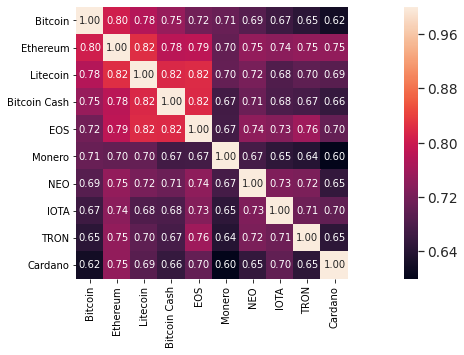

In [7]:
f, ax = plt.subplots(figsize=(20, 5))
ativo='Bitcoin'
k = 10 #number of variables for heatmap
cols = corre.nlargest(k, ativo)[ativo].index
cm = np.corrcoef(output[cols].pct_change().dropna().values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<div id="DBSCAN">
    <h2>2) Clusterização DBSCAN</h2>
</div>

O método de clustering <b>DBSCAN</b> (Density-Based Spatial Clustering of Applications with Noise) é aplicado no aprendizado de máquina para separar clusters com a percepção de densidade. Nessse sentido, o <b>DBSCAN</b> é um algoritmo de cluster que faz seu trabalho procurando áreas nos dados com alta densidade de observações, em comparação com áreas dos dados que não são muito densas. 

Algoritmo <b>DBSCAN</b>: 
<ol> 
  <li>Selecione um ponto $\boldsymbol{p}$ na massa de dados aleatoriamente; </li> &emsp;
  <li>Mapeie todos os pontos $\boldsymbol{p_j}$ que são alcançaveis por $\boldsymbol{p}$ com um <b>eps</b> (distância) e <b>minpts</b> (número de pontos); </li> &emsp;
  <li> Se $\boldsymbol{p_j}$ é um ponto alcançável pertencem ao core de $\boldsymbol{p}$; </li> &emsp;
  <li>Se $\boldsymbol{p_j}$ é um ponto de fronteira, não alcançavel pela densidade de $\boldsymbol{p}$, realiza a visita um próximo ponto da base de dados;  </li> &emsp;
    <li>Continua o processo até que todos os pontos sejam processados, com a clareza que determinados pontos podem ficar fora do alcance (outliers); </li> &emsp;



</ol>
O exemplo será aplicado nos ativos do Índice Amplo B3 &emsp;


Text(0, 0.5, 'Retorno %')

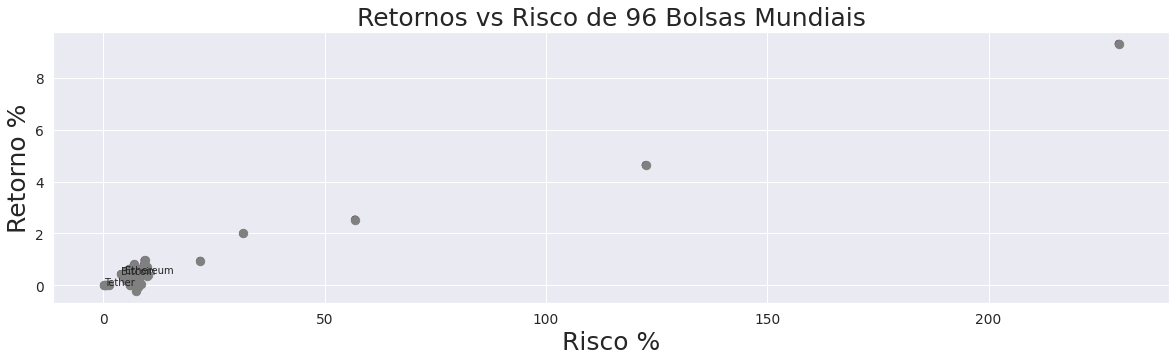

In [8]:
%matplotlib inline 
from sklearn.cluster import DBSCAN
retornos=100*output.pct_change()
stocks=retornos.columns

X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])



clustering = DBSCAN(eps=0.075, min_samples=3).fit(X)

core_samples = clustering.core_sample_indices_
labels = clustering.labels_

fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax1.text(retornos["Bitcoin"].std(),retornos["Bitcoin"].mean(),  "Bitcoin",fontsize=10)
ax1.text(retornos["Ethereum"].std(),retornos["Ethereum"].mean(),  "Ethereum",fontsize=10)
ax1.text(retornos["Tether"].std(),retornos["Tether"].mean(),  "Tether",fontsize=10)
ax1.scatter(X[np.where(labels==-1),0],X[np.where(labels==-1),1][0], s=70, c='gray')
ax1.set_title('Retornos vs Risco de '+str(len(stocks))+' Criptos',fontsize=25)
ax1.set_xlabel('Risco %',fontsize=25)
ax1.set_ylabel('Retorno %',fontsize=25)

In [9]:
retornos.std().sort_values().tail(30)

IOST                 7.351086
Centrality           7.363394
Ravencoin            7.399957
Dash                 7.468564
PRIZM                7.517936
LATOKEN              7.538270
MonaCoin             7.563389
Nano                 7.582353
Crypterium           7.668885
ODEM                 7.813120
Populous             8.018748
Crypto.com Coin      8.118560
BitShares            8.131829
aelf                 8.170628
Digitex Futures      8.463456
Cortex               8.621409
Pundi X              8.941655
Bitcoin SV           9.031763
Quant                9.076180
Nexo                 9.171682
RChain               9.343467
Ren                  9.347745
Civic                9.969291
Tierion             10.002130
Bankera             10.120811
Lisk                21.929116
ThoreNext           31.637210
NEM                 56.932206
Bitcoin Diamond    122.631556
Dogecoin           229.547463
dtype: float64

In [12]:
criptos=list(set(retornos.columns)-set(retornos.std().sort_values().tail(30).keys()))
criptos

['Komodo',
 'Tezos',
 'Litecoin',
 'GXChain',
 'Aeternity',
 'Kyber Network',
 'Aion',
 'Ignis',
 'Monero',
 'Bitcoin Cash',
 'Verge',
 'MCO',
 '0x',
 'STASIS EURO',
 'Ardor',
 'Horizen',
 'MaidSafeCoin',
 'Maker',
 'USD Coin',
 'Elastos',
 'Ethereum Classic',
 'IOTA',
 'NULS',
 'VeChain',
 'Binance Coin',
 'Bitcoin',
 'Decred',
 'DigiByte',
 'Qtum',
 'Dai',
 'Status',
 'Steem',
 'TrueUSD',
 'Augur',
 'WaykiChain',
 'NEO',
 'Ontology',
 'Stellar',
 'Bread',
 'Loopring',
 'TRON',
 'Nebulas',
 'OmiseGO',
 'HyperCash',
 'Cardano',
 'Ethereum',
 'Basic Attention Token',
 'Bytom',
 'Bitcoin Gold',
 'XRP',
 'Huobi Token',
 'Waves',
 'Tether',
 'Chainlink',
 'Waltonchain',
 'Wanchain',
 'Factom',
 'EOS',
 'ICON',
 'ThoreCoin',
 'THETA',
 'Holo',
 'Decentraland',
 'Metaverse ETP',
 'Zcash',
 'Zilliqa']

Text(0, 0.5, 'Retorno %')

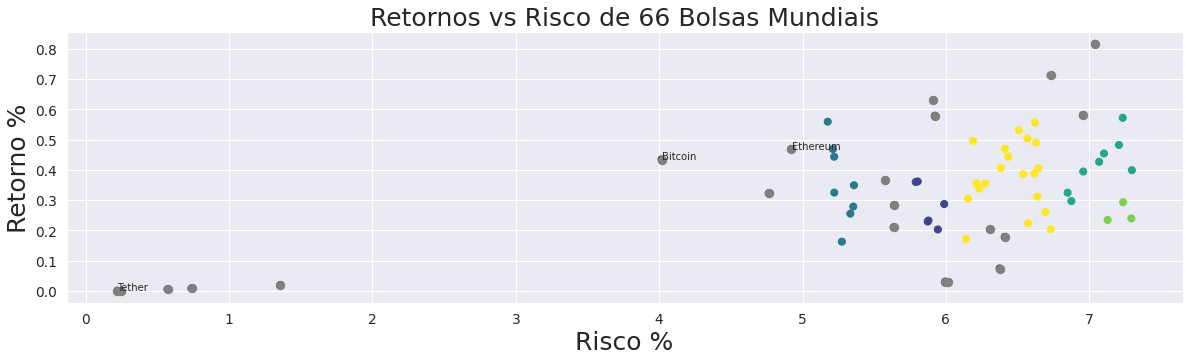

In [13]:
%matplotlib inline 
from sklearn.cluster import DBSCAN
retornos=100*output[criptos].pct_change()
stocks=retornos.columns

X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])

N=3

clustering = DBSCAN(eps=0.15, min_samples=4).fit(X)
clustering.labels_
core_samples = clustering.core_sample_indices_
labels = clustering.labels_

fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax1.text(retornos["Bitcoin"].std(),retornos["Bitcoin"].mean(),  "Bitcoin",fontsize=10)
ax1.text(retornos["Ethereum"].std(),retornos["Ethereum"].mean(),  "Ethereum",fontsize=10)
ax1.text(retornos["Tether"].std(),retornos["Tether"].mean(),  "Tether",fontsize=10)
ax1.scatter(X[np.where(labels==-1),0],X[np.where(labels==-1),1][0], s=70, c='gray')
ax1.set_title('Retornos vs Risco de '+str(len(stocks))+' Bolsas Mundiais',fontsize=25)
ax1.set_xlabel('Risco %',fontsize=25)
ax1.set_ylabel('Retorno %',fontsize=25)

In [14]:
set(clustering.labels_)

{-1, 0, 1, 2, 3, 4}

<b>Fim da Atividade!!!</b> 
